In [ ]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

In [ ]:
mnist_data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist_data .load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images, test_images = training_images/255.0, test_images/255.0

In [ ]:
print(training_images.shape)

(60000, 28, 28)


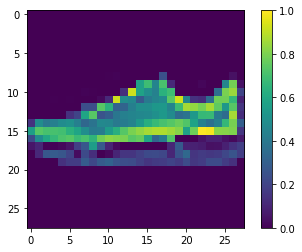

In [ ]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [ ]:
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [ ]:
training_images[0].shape

(28, 28, 1)

In [ ]:
input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)

In [ ]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

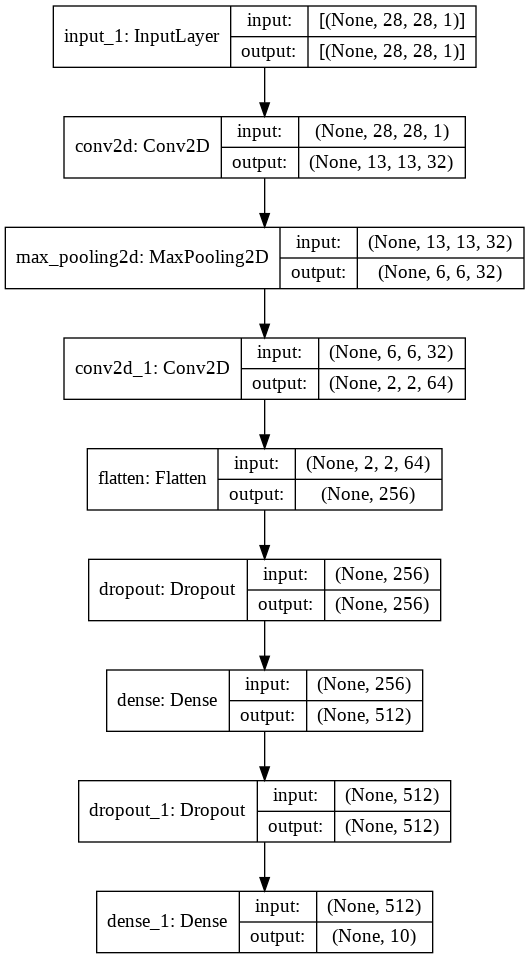

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 39s 4ms/step - loss: 0.7914 - accuracy: 0.7081 - val_loss: 0.4418 - val_accuracy: 0.8317
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4342 - accuracy: 0.8374 - val_loss: 0.3985 - val_accuracy: 0.8545
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3861 - accuracy: 0.8549 - val_loss: 0.3696 - val_accuracy: 0.8637
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3553 - accuracy: 0.8682 - val_loss: 0.3491 - val_accuracy: 0.8745
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3387 - accuracy: 0.8735 - val_loss: 0.3490 - val_accuracy: 0.8754
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3152 - accuracy: 0.8821 - val_loss: 0.3441 - val_accuracy: 0.8765
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2986 - accuracy: 0.8883 - val_loss: 0.3421 - val_accuracy

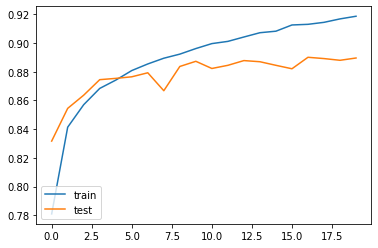

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

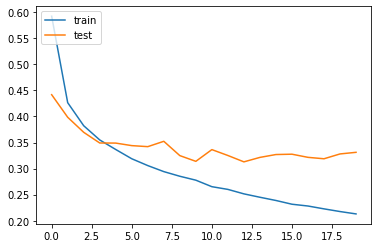

In [ ]:
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

In [ ]:
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)

7
